In [6]:
!pip install tensorflow
!pip install keras

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [8]:
## 1. Data Preprocessing

In [9]:
#loading data
data = pd.read_csv("movie_metadata.csv")

In [10]:
data.shape

(5043, 28)

In [11]:
#Summary of missing values
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
#replacing NaN in Numeric variables by mean value
data = data.fillna(data.mean())     

In [13]:
#replacing NaN in character variables by mode value
for column in data[['color', 'language', 'country', 'content_rating']]:
    mode = data[column].mode()
    data[column] = data[column].fillna(mode)

In [14]:
#dropping remaining records having NaN
data = data.dropna(how='any')

In [15]:
#Summary of missing values
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [16]:
## 2. Data Exploration and Visualization

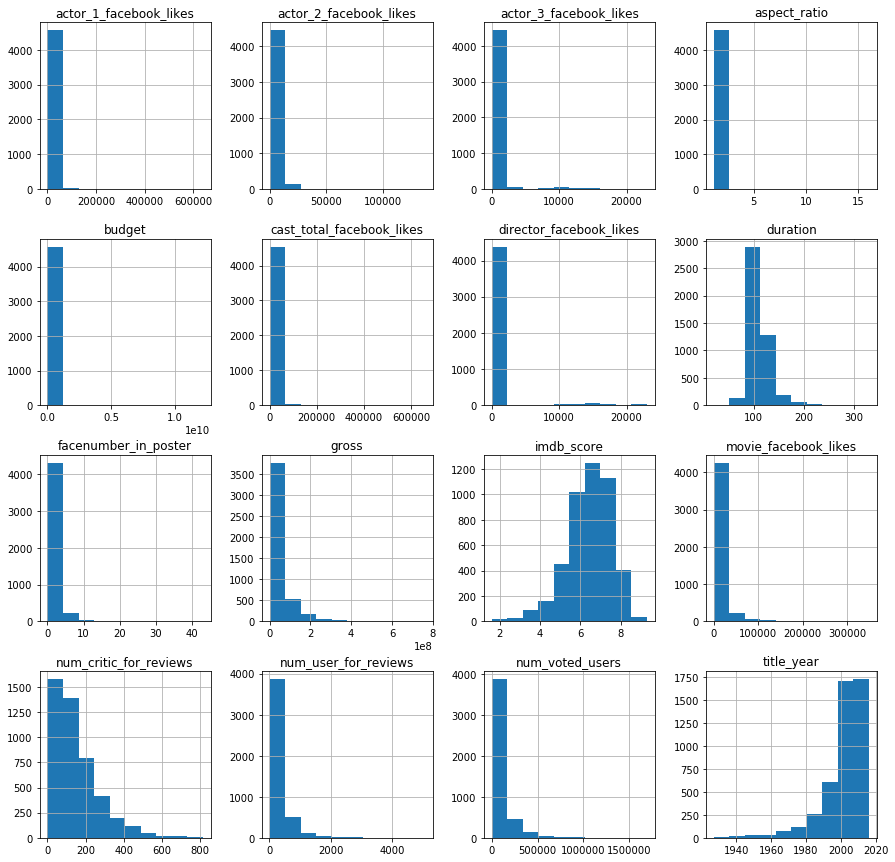

In [17]:
#Variables have roughly the same scale and unit, hence the need for Pre-Processing is eliminated
pd.DataFrame.hist(data, figsize = [15,15]);

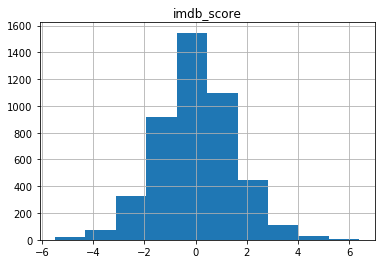

In [18]:
#histogram of imdb scores
data['imdb_score'].diff().hist()
plt.title("imdb_score")

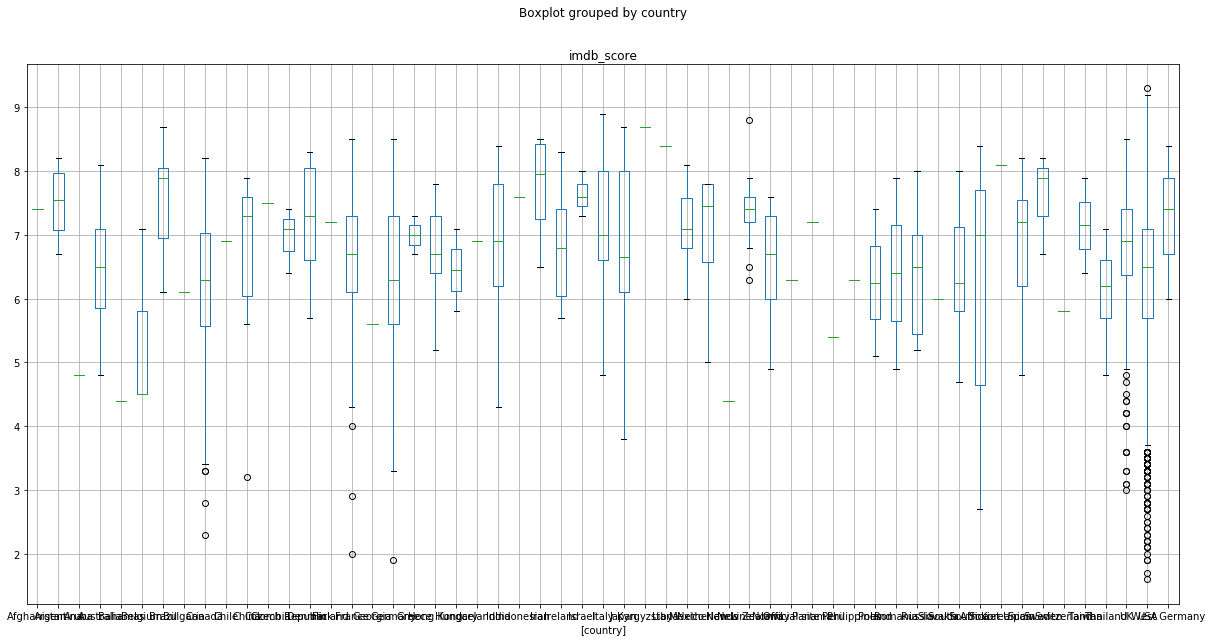

In [19]:
#imdb score vs country
df = data[['country','imdb_score']]
df.boxplot(by='country', figsize = [20,10])
plt.show()

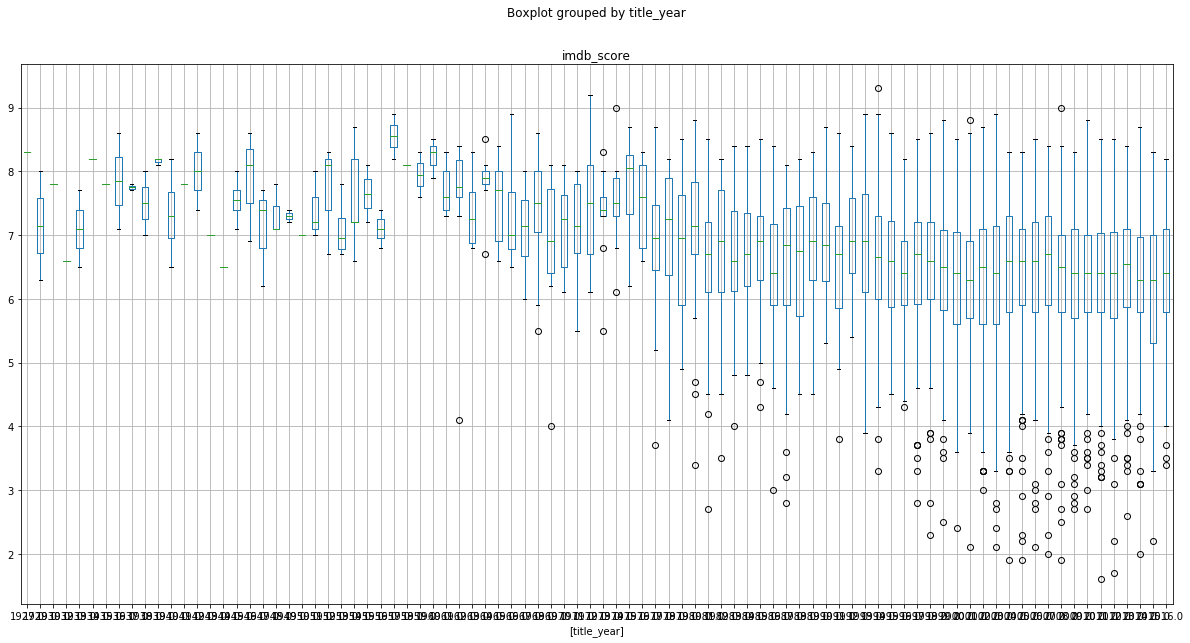

In [20]:
#imdb score vs year
df = data[['title_year','imdb_score']]
df.boxplot(by='title_year', figsize = [20,10])
plt.show()

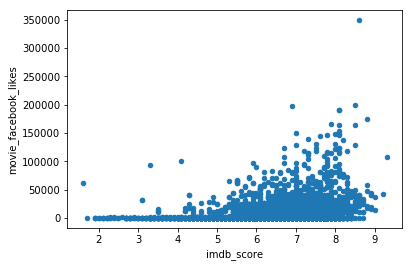

In [21]:
#imdb score vs movie facebook popularity
data.plot.scatter('imdb_score','movie_facebook_likes')

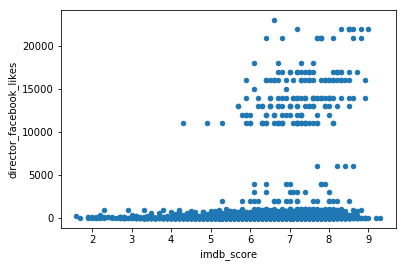

In [22]:
#imdb score vs director facebook popularity
data.plot.scatter('imdb_score','director_facebook_likes')

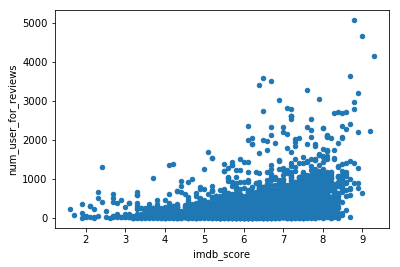

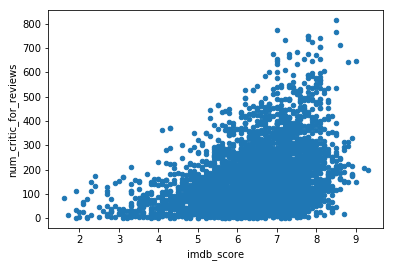

In [23]:
#imdb score vs user reviews and critic reviews
data.plot.scatter('imdb_score','num_user_for_reviews')
data.plot.scatter('imdb_score','num_critic_for_reviews')

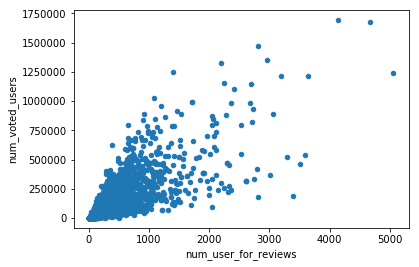

In [24]:
#voted users vs user reviews
data.plot.scatter('num_user_for_reviews','num_voted_users')

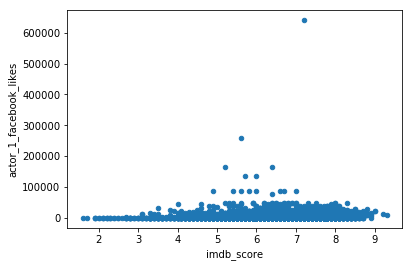

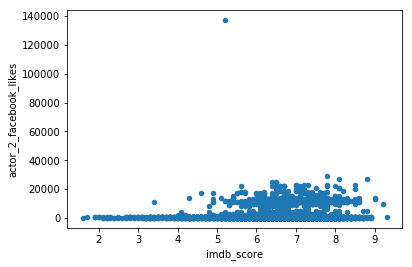

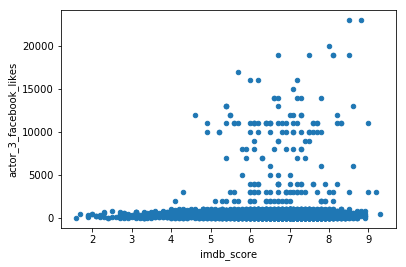

In [25]:
#imdb score vs 3 actors facebook popularity
data.plot.scatter('imdb_score','actor_1_facebook_likes')
data.plot.scatter('imdb_score','actor_2_facebook_likes')
data.plot.scatter('imdb_score','actor_3_facebook_likes')

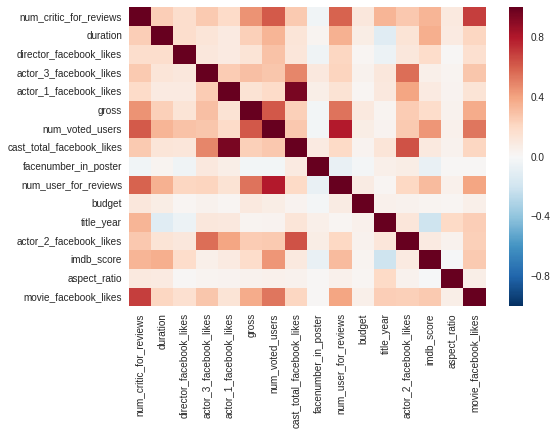

In [26]:
import seaborn
seaborn.heatmap(data.corr())

In [27]:
#dropping 'cast_total_facebook_likes' as 'cast_total_facebook_likes'-'actor_1_facebook_likes' are highly correlated
data = data.drop('cast_total_facebook_likes', axis=1)
#dropping 'num_user_for_reviews' as 'num_user_for_reviews'-'num_voted_users' are highly correlated
data = data.drop('num_user_for_reviews', axis=1)

In [28]:
#selecting relevant variables
data = data[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes',
                    'gross','facenumber_in_poster','budget','aspect_ratio','actor_2_facebook_likes',
                              'movie_facebook_likes','title_year','imdb_score']]

In [29]:
data.shape

(4581, 13)

In [30]:
## 3. Model Development and Evaluation                     

In [31]:
#split into input (X) and output (Y) variables
X = data.iloc[:, 0:12].values
Y = data.iloc[:, 12:13].values

In [32]:
X.shape

(4581, 12)

In [33]:
Y.shape

(4581, 1)

In [34]:
#define base model
def baseline_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [35]:
#evaluate base model
np.random.seed(42)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=10, batch_size=50, verbose=1)
#using 10-fold cross validation to evaluate the model
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/1
459/459 [==============================] - 0s 54us/step
Epoch 1/1
458/458 [==============================] - 0s 69us/step
Epoch 1/1
458/458 [==============================] - 0s 90us/step
Epoch 1/1
458/458 [==============================] - 0s 98us/step
Epoch 1/1
458/458 [==============================] - 0s 119us/step
Epoch 1/1
458/458 [==============================] - 0s 133us/step
Epoch 1/1
458/458 [==============================] - 0s 171us/step
Epoch 1/1
458/458 [==============================] - 0s 168us/step
Epoch 1/1
458/458 [==============================] - 0s 213us/step
Epoch 1/1
458/458 [==============================] - 0s 210us/step
Results: -6.44 (0.11) MAE


In [ ]:
The scores returned by cross_val_score is negative because cross_val_score represents the larger the loss function 
the better the model. The actual MAE is simply the postive version of the number you're getting which means 
scores that are actually losses need to be negated.

In [36]:
#define larger model
#adding four more hidden layers to the base model
def larger_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(9, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [37]:
#evaluate larger model
np.random.seed(42)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=larger_model, nb_epoch=10, batch_size=50, verbose=1)
#using 10-fold cross validation to evaluate the model
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/1
459/459 [==============================] - 0s 249us/step
Epoch 1/1
458/458 [==============================] - 0s 288us/step
Epoch 1/1
458/458 [==============================] - 0s 340us/step
Epoch 1/1
458/458 [==============================] - 0s 362us/step
Epoch 1/1
458/458 [==============================] - 0s 391us/step
Epoch 1/1
458/458 [==============================] - 0s 434us/step
Epoch 1/1
458/458 [==============================] - 0s 482us/step
Epoch 1/1
458/458 [==============================] - 0s 670us/step
Epoch 1/1
458/458 [==============================] - 0s 564us/step
Epoch 1/1
458/458 [==============================] - 0s 605us/step
Results: -5.95 (0.73) MAE


In [38]:
#define wider model, nearly doubling the number of neurons in two hidden layers
def wider_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(26, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [39]:
#evaluate wider model
np.random.seed(42)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=wider_model, nb_epoch=10, batch_size=50, verbose=1)
#using 10-fold cross validation to evaluate the model
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/1
459/459 [==============================] - 0s 653us/step
Epoch 1/1
458/458 [==============================] - 0s 646us/step
Epoch 1/1
458/458 [==============================] - 0s 679us/step
Epoch 1/1
458/458 [==============================] - 0s 721us/step
Epoch 1/1
458/458 [==============================] - 0s 735us/step
Epoch 1/1
458/458 [==============================] - 0s 779us/step
Epoch 1/1
458/458 [==============================] - 0s 795us/step
Epoch 1/1
458/458 [==============================] - 0s 811us/step
Epoch 1/1
458/458 [==============================] - 0s 867us/step
Epoch 1/1
458/458 [==============================] - 0s 874us/step
Results: -6.44 (0.11) MAE


In [159]:
## Conclusion
1.The model having more number of hidden layers is performing better than the model having more number of neurons. 
2.Director facebook likes and actors facebook likes matter. There is not much gain from adding the categorical and 
the keywords variables.
3.We have removed the correlated variables as we wanted to reduce the number of variables for the fitting to happen 
in a reasonable amount of time

In [ ]:
## Future Improvement
1.We happened to run my models a few times (without poster information, with plot_keywords, and without directors) but still 
unable to minimize the error,we believe it might be possible with some external data.
2.Further work more on data preprocessing, feature engineering and adding hyperparameter values.
3.Further research more about tensor flow and explore neural network techniques.